In [1]:
# -- coding: utf-8 --
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Dados coletados
antes = [3.2, 3.6, 3.4, 3.8, 3.4, 3.5, 3.7, 3.2, 3.5, 3.9]
depois = [3.0, 3.3, 3.5, 3.6, 3.4, 3.3, 3.4, 3.0, 3.2, 3.6]

# Cálculo das diferenças
diferencas = np.array(antes) - np.array(depois)

# Estatísticas descritivas
n = len(diferencas)
media_diff = np.mean(diferencas)
desvio_diff = np.std(diferencas, ddof=1)
t_estat = media_diff/(desvio_diff/np.sqrt(n))

In [3]:
# Teste t pareado
t_critico = stats.t.ppf(1-0.05, df=n-1)
p_valor = stats.t.sf(t_estat, df=n-1)

# Configuração do gráfico
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

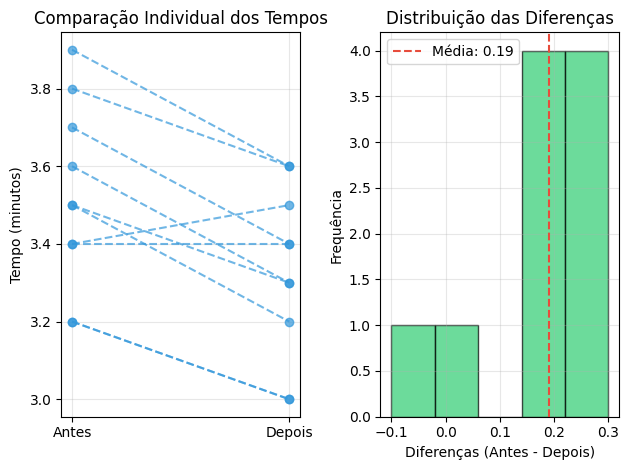

=== Resultados do Teste t Pareado ===
Média das diferenças: 0.190
Desvio padrão das diferenças: 0.137
Estatística t: 4.385
Valor crítico (α=5%): 1.833
Valor-p: 0.0009
Conclusão: Rejeitamos H₀


In [4]:
# Gráfico 1: Comparação direta
plt.subplot(1, 2, 1)
for i in range(n):
    plt.plot([1, 2], [antes[i], depois[i]], 'o--', color='#3498db', alpha=0.7)
plt.xticks([1, 2], ['Antes', 'Depois'])
plt.ylabel('Tempo (minutos)')
plt.title('Comparação Individual dos Tempos')
plt.grid(alpha=0.3)

# Gráfico 2: Distribuição das diferenças
plt.subplot(1, 2, 2)
plt.hist(diferencas, bins=5, color='#2ecc71', edgecolor='black', alpha=0.7)
plt.axvline(media_diff, color='#e74c3c', linestyle='--', label=f'Média: {media_diff:.2f}')
plt.xlabel('Diferenças (Antes - Depois)')
plt.ylabel('Frequência')
plt.title('Distribuição das Diferenças')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Resultados numéricos
print(f'''=== Resultados do Teste t Pareado ===
Média das diferenças: {media_diff:.3f}
Desvio padrão das diferenças: {desvio_diff:.3f}
Estatística t: {t_estat:.3f}
Valor crítico (α=5%): {t_critico:.3f}
Valor-p: {p_valor:.4f}
Conclusão: {'Rejeitamos H₀' if p_valor < 0.05 else 'Não rejeitamos H₀'}''')